In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k


In [2]:
batch_size=128
num_classes=10
epochs=12


In [3]:
#input image dimensions
img_rows,img_cols=28,28

In [4]:
#load mnist dataset from keras
from keras.datasets import mnist
#download mnist data and split into train & test sets
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [5]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Training set labels shape: {}'.format(ytrain.shape))
print('Test set images shape: {}'.format(xtest.shape))
print('Test set labels shape: {}'.format(ytest.shape))


Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


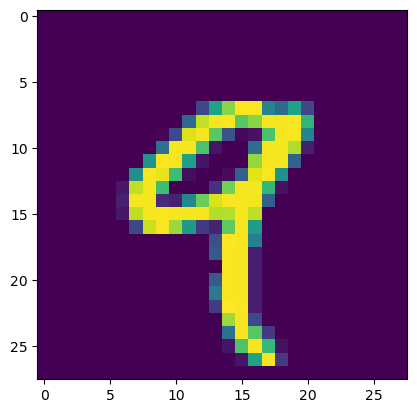

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[4])

In [7]:
xtrain[0].shape

(28, 28)

# Data Pre-processing

In [8]:
#reshape data to fit model
xtrain=xtrain.reshape(xtrain.shape[0],img_rows,img_cols,1)
xtest=xtest.reshape(xtest.shape[0],img_rows,img_cols,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [10]:
xtrain/=255
xtest/=255

In [11]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
#Convert class vectors to binary class matrices
ytrain=keras.utils.to_categorical(ytrain)
ytest=keras.utils.to_categorical(ytest)


In [13]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Build CNN model

In [14]:
model=Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
#output layer
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 dropout (Dropout)           (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                        

In [16]:
#compile
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,
 metrics=['accuracy'] )


In [17]:
result=model.fit(xtrain,ytrain,batch_size=batch_size,epochs=5,verbose=1,
 validation_data=(xtest,ytest))


Epoch 1/5
469/469 [==============================] - 129s 269ms/step - loss: 0.2464 - accuracy: 0.9277 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 2/5
469/469 [==============================] - 138s 291ms/step - loss: 0.0706 - accuracy: 0.9794 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 3/5
469/469 [==============================] - 141s 301ms/step - loss: 0.0512 - accuracy: 0.9842 - val_loss: 0.0537 - val_accuracy: 0.9827
Epoch 4/5
469/469 [==============================] - 140s 299ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0449 - val_accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 140s 299ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0410 - val_accuracy: 0.9870


In [18]:
score=model.evaluate(xtest,ytest,verbose=0)
print('Test Loss:',score[0])
print()
print('Test Accuracy:',score[1])

Test Loss: 0.040976010262966156

Test Accuracy: 0.9869999885559082


In [19]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

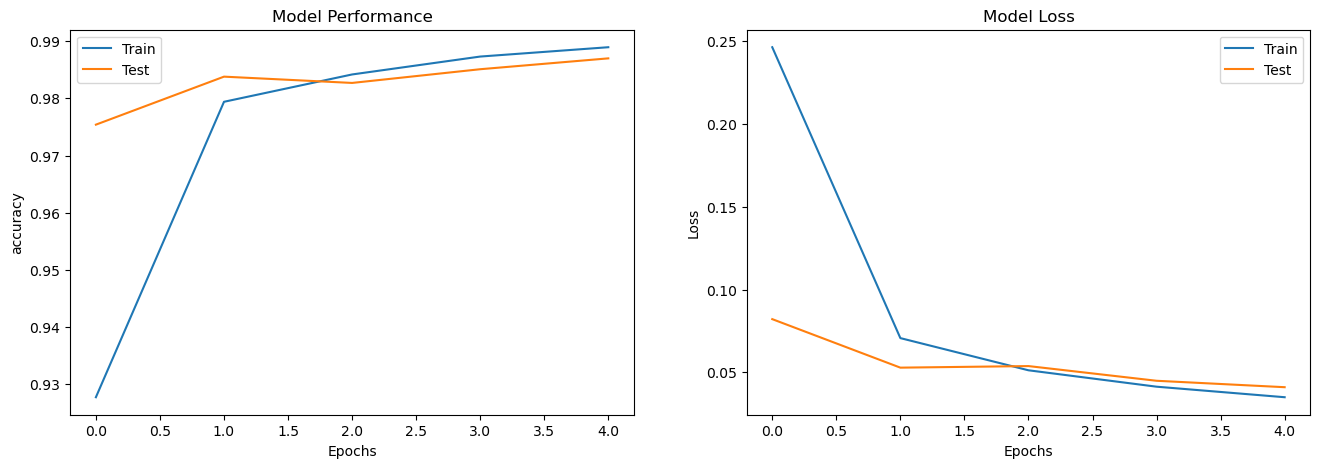

In [20]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
#plot training & validation accuracy values
ax1.plot(result.history['accuracy'])
ax1.plot(result.history['val_accuracy'])
ax1.set_title('Model Performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('Epochs')
ax1.legend(['Train','Test'])
#plot training & validation loss values
ax2.plot(result.history['loss'])
ax2.plot(result.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend(['Train','Test'])


In [21]:
ypred=model.predict(xtest[:4])
ypred


1/1 [==============================] - 1s 620ms/step


array([[4.36579592e-12, 2.34728664e-12, 3.14176596e-08, 1.45613410e-06,
        1.43977956e-13, 3.00611758e-11, 1.61000863e-17, 9.99998450e-01,
        1.31556077e-09, 7.60230918e-08],
       [1.47443115e-08, 4.41839887e-07, 9.99997377e-01, 1.16227152e-08,
        8.92326469e-13, 1.24020266e-10, 2.02150500e-06, 2.55394427e-14,
        1.17474187e-07, 1.23203019e-11],
       [1.05366280e-06, 9.99064744e-01, 2.07208413e-05, 1.38249050e-06,
        6.65947504e-04, 2.76735113e-06, 2.72937291e-06, 1.18804790e-04,
        1.21719517e-04, 2.15527578e-07],
       [9.99923229e-01, 1.29493703e-12, 6.26576957e-06, 9.23362364e-09,
        2.86242940e-09, 8.95310777e-08, 7.03627738e-05, 1.70833192e-09,
        4.42979378e-08, 1.07036948e-08]], dtype=float32)

In [22]:
ytest[:4]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)